In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy
from datetime import datetime

In [7]:
contract_address = '0x2a0c0dbecc7e4d658f48e01e3fa353f44050c208'

chunkSize = 1000000
chunkNum = 50

transactions_chunk = pd.read_csv('../../transactions.csv',sep='\s+|"',engine='python',chunksize=chunkSize,skiprows=1,names=['first_Na','id','hash','nonce','block_hash','block_number','transaction_index','from_address','to_address','value','gas','gas_price','input','block_timestamp','Last_Na'],usecols=range(1,14))
date_list = []
active_accounts = pd.read_csv('../../active_wallets.csv',sep=':|\s+|"',engine='python',names=['fist_Na','id','from_address','to_address','contract_type','contract_name','tx_count','last_Na'],skiprows=1,usecols=range(1,7))
active_accounts_list = pd.Series([[]]*len(active_accounts.index), index=active_accounts['from_address'])

i=0
for chunk in transactions_chunk:
    print(i)
    if(i>=chunkNum):
        break
    i+=1
    

    for index, row in chunk.loc[chunk['to_address'] == contract_address, ['from_address', 'block_timestamp']].iterrows():
#        print(row['from_address'])
        if active_accounts_list[row['from_address']] == []:
            active_accounts_list[row['from_address']] = [datetime.utcfromtimestamp(row['block_timestamp']).strftime('%Y-%m-%d')]
        elif active_accounts_list[row['from_address']] != []:
            active_accounts_list[row['from_address']].append(datetime.utcfromtimestamp(row['block_timestamp']).strftime('%Y-%m-%d'))
        else:
            print("ERROR", index, row)
#        print(index, active_accounts_list)
       
#date_list = set(date_list)
#print(date_list, len(date_list))
for index, r in active_accounts_list.items():
    active_accounts_list[index] = set(r)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


In [54]:
from datetime import timedelta

start_date = '2019-03-19'
end_date = '2019-05-05'

date = start_date
retention_list = []

while date != end_date:
    target_date = (datetime.strptime(date,'%Y-%m-%d') + timedelta(days=1)).strftime('%Y-%m-%d')
    start_address = []
    end_address = []

    for index, value in active_accounts_list.iteritems():
        if date in value:
            start_address.append(index)
        if target_date in value:
            end_address.append(index)

    if start_address:
        retention_list.append(float(len(list(set(start_address).intersection(end_address))))/float(len(start_address)))
    else:
        retention_list.append(0)
        
    date = (datetime.strptime(date,'%Y-%m-%d') + timedelta(days=1)).strftime('%Y-%m-%d')
        
print(numpy.mean(retention_list))
    

0.19017501114227955


In [106]:
start_date = '2019-03-19'
end_date = '2019-05-05'

range_date_list = pd.Series([[]]*7, index=range(0,7))

for week in range(0,7):
    range_date_list[week] = [(datetime.strptime(start_date,'%Y-%m-%d') + timedelta(days=week*7)).strftime('%Y-%m-%d')]
    for day in range(1,7):
        range_date_list[week].append((datetime.strptime(start_date,'%Y-%m-%d') + timedelta(days=week*7+day)).strftime('%Y-%m-%d'))
    
range_address_list = pd.Series([[]]*7, index=range(0,7))
    
for week in range(0,7):
    for index, value in active_accounts_list.iteritems():
        if set(range_date_list[week]).intersection(value):
            if range_address_list[week]:
                range_address_list[week].append(index)
            else:
                range_address_list[week] = [index]

retention_2d = [[0,0,0,0,0,0,0],[0,0,0,0,0,0,0],[0,0,0,0,0,0,0],[0,0,0,0,0,0,0],[0,0,0,0,0,0,0],[0,0,0,0,0,0,0],[0,0,0,0,0,0,0]]
                
for reference_week in range(0,7):
    for period in range(0,7-reference_week):
        retention_list = []
        if range_address_list[reference_week]:
            print(reference_week, period)
            print(len(range_address_list[reference_week]))
            print(len(range_address_list[reference_week+period]))
            retention_list.append(float(len(set(range_address_list[reference_week]).intersection(range_address_list[reference_week+period])))/float(len(range_address_list[reference_week])))
        else:
            print(reference_week, period)
            print(len(range_address_list[reference_week]))
            print(len(range_address_list[reference_week+period]))
            retention_list.append(0)
        print(numpy.mean(retention_list))
        retention_2d[reference_week][period] = numpy.mean(retention_list)

(0, 0)
4204
4204
1.0
(0, 1)
4204
6035
0.3460989533777355
(0, 2)
4204
5968
0.28425309229305423
(0, 3)
4204
4435
0.20528068506184585
(0, 4)
4204
5331
0.22288296860133205
(0, 5)
4204
4924
0.19624167459562322
(0, 6)
4204
3714
0.16127497621313036
(1, 0)
6035
6035
1.0
(1, 1)
6035
5968
0.3010770505385253
(1, 2)
6035
4435
0.21822700911350457
(1, 3)
6035
5331
0.21226180613090306
(1, 4)
6035
4924
0.19154929577464788
(1, 5)
6035
3714
0.15045567522783762
(2, 0)
5968
5968
1.0
(2, 1)
5968
4435
0.24547587131367293
(2, 2)
5968
5331
0.22101206434316353
(2, 3)
5968
4924
0.19520777479892762
(2, 4)
5968
3714
0.153485254691689
(3, 0)
4435
4435
1.0
(3, 1)
4435
5331
0.28455467869222095
(3, 2)
4435
4924
0.2491544532130778
(3, 3)
4435
3714
0.18737316798196166
(4, 0)
5331
5331
1.0
(4, 1)
5331
4924
0.27743387732132807
(4, 2)
5331
3714
0.19752391671356218
(5, 0)
4924
4924
1.0
(5, 1)
4924
3714
0.24675060926076361
(6, 0)
3714
3714
1.0


In [107]:
retention_2d

[[1.0,
  0.3460989533777355,
  0.28425309229305423,
  0.20528068506184585,
  0.22288296860133205,
  0.19624167459562322,
  0.16127497621313036],
 [1.0,
  0.3010770505385253,
  0.21822700911350457,
  0.21226180613090306,
  0.19154929577464788,
  0.15045567522783762,
  0],
 [1.0,
  0.24547587131367293,
  0.22101206434316353,
  0.19520777479892762,
  0.153485254691689,
  0,
  0],
 [1.0, 0.28455467869222095, 0.2491544532130778, 0.18737316798196166, 0, 0, 0],
 [1.0, 0.27743387732132807, 0.19752391671356218, 0, 0, 0, 0],
 [1.0, 0.24675060926076361, 0, 0, 0, 0, 0],
 [1.0, 0, 0, 0, 0, 0, 0]]

In [116]:
active_period = pd.Series()
active_period

for index, value in active_accounts_list.iteritems():
    active_period[index] = len(value)



0xadd2f28b087afca908a06affcafeb57cecb3de4a     1
0xdf09dda2982f12c144a932d3d14b7edeace5a984     3
0xb6d7ffe4446f95e6026ca0d5c6700672fd7cc7a5     4
0x90d1e63fd61bedee4447ca9398d0d15cdbd4dd42    43
0x294bce6596bcb9881fa4740aa66d3b9a90a944d9     2
0x523e025e9194daebafa27905be31cfc54538bb08     7
0x55844d0fd6f6255e03852a50e3176bcb7e0bab78     6
0x82712846b72fd7fdbd869f5355166934b1ca2749    36
0xbec7c55760b2927d81e70d3a91a064ddc5f54683     2
0x2b6d31b7668cd688848c16f7ca94392eeb21c227     2
0xa7a7899d944fe658c4b0a1803bab2f490bd3849e    48
0x61b4c5ac588717379531c099118b5439e7938041     1
0xd7901f83ec0abc97ea49c73190defa8fa22c928d     1
0x71a5aad72f5d1b4ac9dcb2ffe2e4c45ec76a4703     2
0x7593bb38799d3112cd7d5675483eeb99a33a66af     1
0xfbc571124bc7dfb222e67e8495b680a225296c32    10
0xa249c6050cc5876afc79fc065a6300f608369ed1     8
0x05cbcf4f4c2a0839770ff1ba8164aedd832baa51     4
0x9824ec0015ec20b87f4398ad003fbf9318966439     5
0xa9dab107b0d774abc0e0c5f4c6723a15830b20d6     3
0x7c3c05d63dd13aab94

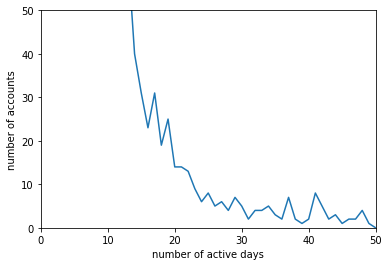

Series([], dtype: int64)
21880
(195, 13420, 3738, 1676)
123
2.1928702011


In [146]:
width = 50
height = 50

hist, bin_edges = numpy.histogram(active_period, bins = width, range=(0,width))
plt.plot(bin_edges[1:], hist)
plt.ylim((0,height))
plt.xlim((0,width))
plt.xlabel('number of active days')
plt.ylabel('number of accounts')
plt.show()

print(active_period.loc[active_period > width])
print(len(active_period))
print(len(active_period.loc[active_period == 0]), len(active_period.loc[active_period == 1]), len(active_period.loc[active_period == 2]), len(active_period.loc[active_period == 3]))
print(len(active_period.loc[active_period > 20]))
print(numpy.mean(active_period))

In [148]:
print(active_period[-200:-180])

0x5fe65d7c752685e3bd13e341c11cd9945011a0af    1
0xf953fa4f298bec98a3f2b4567efac379bab7092e    1
0xe34f7bd1cab7b327dfed26dc47b161d98c7db026    1
0x8f0f6cb02aa427088b9561b07a7746092f69c089    1
0xbfd2176872b0e3826784561dbd507cb95eab3f4c    1
0xc89f8f685f9ad7f9306141a7f74266208863ab3e    0
0x1742c8be0af2d6c80127c2d7a3e8bfcc1eef3692    0
0x0e34fb8fb1ec873118824f75edf0f04fa2462f0a    0
0x5dd481d6bb3c22dd3ca30bbfa2fb18d997dff7f5    0
0xdd6c2172861b51a742a2bd9224d8083c27bb40f7    0
0x7ff445ceb11549b9e9a114b0f2f32bb8eee356f1    0
0x3643ca3d5fa69638e4c5756190b9bf0bcdf075e0    0
0x276591c66dc1b34e37d584afef8943166327fdbe    0
0x0296e1d8d76e6bf3526bbf4e536e8d454dd61293    0
0x2368ad375a9e20a78971ba2daa7550825a4aaa65    0
0x0dc290114023af5614868a6ef0147be261a4baa7    0
0xfa11430f75543ce24701c26039e4f167b3a2e5e7    0
0x2ef9eadf9ec4893aacf56ab5bc5cda9ed28daf74    0
0x71b959c89ca613cce3d7b3270149d919143c1dff    0
0x0bea69cdd1828142f0b9927b67635befc143c5ba    0
dtype: int64
